# “California Housing Price Prediction”


### Importing Packages and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



C:\Users\samira\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Importing Dataset

In [2]:
housing = (r"C:\Users\samira\Desktop\machine learning\Machine_Learning_Projects\Projects\Projects for submission\California Housing Price Prediction\Dataset for the project\housing.csv")


In [3]:
mydata = pd.read_csv(housing)

### Exploring Data

In [4]:
mydata.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
mydata.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
mydata.shape

(20640, 10)

In [8]:
mydata.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

### Defining Independent and Dependent Variables

In [9]:
iv = mydata[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']]

In [10]:
dv = mydata[['median_house_value']]


### Handle Missing Values

In [11]:
mydata.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [12]:
from sklearn.preprocessing import Imputer
imputer= Imputer()
iv[['total_bedrooms']] = imputer.fit_transform(iv[['total_bedrooms']])

## mydata.fillna(mydata.mean(),inplace= True)

## counting NaN in each column
## mydata.isnull().sum()

C:\Users\samira\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\samira\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
iv.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

### Encode Catagorical Data

In [14]:
iv.dtypes


longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
dtype: object

In [15]:
iv=pd.get_dummies(iv,drop_first=True)



In [16]:
iv.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,1,0


### Splitting the Data for Test and Train

In [43]:
from sklearn.model_selection import train_test_split
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size = 0.2, random_state = 0)

In [44]:
print(iv_train.shape)
print(iv_test.shape)
print(dv_train.shape)
print(dv_test.shape)

(16512, 12)
(4128, 12)
(16512, 1)
(4128, 1)


### Standardize Data 

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
iv_train = sc.fit_transform(iv_train)
iv_test = sc.transform(iv_test)

### Perform Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(iv_train,dv_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print(iv_train.shape)
print(dv_train.shape)


(16512, 12)
(16512, 1)


In [22]:
### predicted value
pv = linear_reg.predict(iv_test)


In [23]:
pv= pd.DataFrame(pv)
pv.head()

,0
0,216580.434451
1,287452.107836
2,179457.580646
3,86485.418340
4,291756.937449


In [24]:
print(linear_reg.coef_)

print(linear_reg.intercept_)


[[-53885.46840492 -54527.98744494  13517.23094821  -9383.62758367
   28402.20799753 -44213.3895578   29852.9318759   73896.66913485
  -17955.9920856    2179.55724968  -1352.89404805   1870.26744648]]
[207249.89589389]


In [25]:
#feature_cols = mydata.drop(['median_house_value'],axis=1).columns
#feature_cols

In [26]:
#list(zip(feature_cols,linear_reg.coef_))

In [27]:
print("The R Square of the model is " , linear_reg.score (iv_train,dv_train))
print("The Coefficient of Regression is/are" ,linear_reg.coef_)
print("The Intercept of the model is " ,linear_reg.intercept_)


The R Square of the model is  0.6471730344800684
The Coefficient of Regression is/are [[-53885.46840492 -54527.98744494  13517.23094821  -9383.62758367
   28402.20799753 -44213.3895578   29852.9318759   73896.66913485
  -17955.9920856    2179.55724968  -1352.89404805   1870.26744648]]
The Intercept of the model is  [207249.89589389]


In [28]:
## Root of Squared Mean

from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = sqrt(mean_squared_error(dv_test,pv))


In [29]:
RMSE

68689.2056170515

In [30]:
###Linear Regression model is 64% accurate

### Decission Tree Regression

In [31]:
from sklearn.tree import DecisionTreeRegressor
linear_reg = DecisionTreeRegressor(random_state = 0)
linear_reg.fit(iv_train, dv_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [32]:
# Predicting the values on test data
dtr_pred = linear_reg.predict(iv_test)

In [33]:
# Prediction value
dtr_pred = pd.DataFrame(dtr_pred)
dtr_pred.head()

,0
0,136800.0
1,264400.0
2,160300.0
3,96300.0
4,500001.0


In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE= sqrt(mean_squared_error(dv_test,dtr_pred))


In [35]:
# Root mean squared_error for Decision Tree
RMSE

69081.13272724762

### Random forest Regression

In [36]:
from sklearn.ensemble import RandomForestRegressor
linear_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
linear_reg.fit(iv_train, dv_train)


C:\Users\samira\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [37]:
rfr_pred = linear_reg.predict(iv_test)

In [38]:
dv_test.shape

(4128, 1)

In [39]:
# Prediction values for Random Forest Regression Model
rfr_pred

array([148140., 221540., 145750., ..., 144700., 203810., 188090.])

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt

RMSE = sqrt(mean_squared_error(dv_test, rfr_pred))

In [41]:
# Root squared mean error for Random Forest
RMSE

51510.47578463628

# Perform Linear Regression with one independent variable 

In [45]:
X_train = iv_train[["median_income"]]

In [46]:
X_train = pd.DataFrame(X_train)

In [47]:
print(X_train.shape)

(16512, 1)


In [48]:
X_test = iv_test[['median_income']]

In [49]:
X_test = pd.DataFrame(X_test)

In [50]:
print(X_test.shape)

(4128, 1)


In [51]:
Y_train = dv_train['median_house_value']

In [52]:
Y_train = pd.DataFrame(Y_train)

In [53]:
print(Y_train.shape)

(16512, 1)


In [54]:
Y_test = dv_test['median_house_value']

In [55]:
Y_test = pd.DataFrame(Y_test)

In [56]:
print(Y_test.shape)

(4128, 1)


### Linear Regression Predicting House Value

In [57]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
dv_train.head()

,median_house_value
12069,500001
15925,270000
11162,196100
4904,118800
4683,225000


In [59]:
pv = linear_reg.predict(X_test)

In [60]:
# Predicted Values
pv = pd.DataFrame(pv)

In [61]:
pv.head()

,0
0,218829.830598
1,287249.809456
2,227105.966387
3,147345.705986
4,254687.481393


In [62]:
X_test.head()

,median_income
14740,4.1518
10101,5.7796
20566,4.3487
2670,2.4511
15709,5.0049


In [63]:
pv.shape

(4128, 1)

In [64]:
X_test.shape

(4128, 1)

C:\Users\samira\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


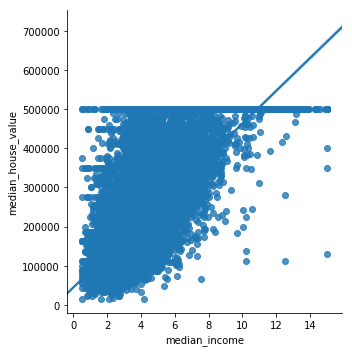

In [65]:
sns.lmplot(x='median_income',y ='median_house_value' ,data = mydata)

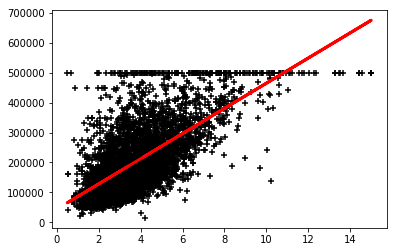

In [66]:
plt.scatter(X_test,Y_test,color = 'black',marker = '+')
plt.plot(X_test,pv,linewidth = 3,color = 'red')
plt.show()

### Coefficient and Intercept

In [67]:
print("The R Square of the model is " ,linear_reg.score(X_train,Y_train))
print("The Coefficient of Regression is/are" ,linear_reg.coef_)
print("The Intercept of the model is " ,linear_reg.intercept_)


The R Square of the model is  0.479914127199415
The Coefficient of Regression is/are [[42032.17769894]]
The Intercept of the model is  [44320.63522766]


### Mean Square Error

In [68]:
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = sqrt(mean_squared_error(dv_test,dtr_pred))

In [69]:
RMSE

69081.13272724762